In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import data
preCovid = pd.read_csv('/content/drive/MyDrive/covid_crime_micro_geo_11_29_2021.csv', index_col=0)
covid = pd.read_csv('/content/drive/MyDrive/precovid_crime_micro_geo_11_29_2021.csv', index_col=0)
print('Pre-Covid shape:',preCovid.shape)
print('Covid shape:',covid.shape)

Pre-Covid shape: (43164, 52)
Covid shape: (104359, 52)


### Prepare Pre-Covid Data

In [3]:
preCovid.columns

Index(['SHIFT', 'OFFENSE', 'WARD', 'LATITUDE', 'LONGITUDE', 'date',
       'total_cases', 'daily_cases', 'daily_death',
       'OUT_POSITIVE_QUARANTINE_PSMPD', 'MO', 'TU', 'WE', 'TH', 'FR', 'SA',
       'SU', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON',
       'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER', 'DAY', 'EVENING', 'MIDNIGHT',
       'distance_metro', 'distance_nightclubs', 'distance_worship'],
      dtype='object')

In [4]:
preCovid_w = preCovid.drop(columns=['SHIFT', 'OFFENSE','LATITUDE', 'LONGITUDE',
       'date', 'total_cases', 'daily_cases', 'daily_death',
       'OUT_POSITIVE_QUARANTINE_PSMPD','ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8'])

In [5]:
preCovid_w.columns

Index(['WARD', 'MO', 'TU', 'WE', 'TH', 'FR', 'SA', 'SU', 'JAN', 'FEB', 'MAR',
       'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ARSON',
       'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'HOMICIDE',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE', 'THEFT F/AUTO',
       'THEFT/OTHER', 'DAY', 'EVENING', 'MIDNIGHT', 'distance_metro',
       'distance_nightclubs', 'distance_worship'],
      dtype='object')

In [6]:
preCovid_X = preCovid_w.drop('WARD', axis=1).copy()
preCovid_y = preCovid_w['WARD'].copy()

In [7]:
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(preCovid_X,preCovid_y,test_size=.3, random_state=0)

In [8]:
print(X_train_pre.shape)
print(y_train_pre.shape)
print(X_test_pre.shape)
print(y_test_pre.shape)

(30214, 34)
(30214,)
(12950, 34)
(12950,)


### Prepare Covid Data

In [9]:
covid.columns

Index(['SHIFT', 'OFFENSE', 'WARD', 'LATITUDE', 'LONGITUDE', 'date',
       'total_cases', 'daily_cases', 'daily_death',
       'OUT_POSITIVE_QUARANTINE_PSMPD', 'MO', 'TU', 'WE', 'TH', 'FR', 'SA',
       'SU', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON',
       'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER', 'DAY', 'EVENING', 'MIDNIGHT',
       'distance_metro', 'distance_nightclubs', 'distance_worship'],
      dtype='object')

In [10]:
covid_w = covid.drop(columns=['SHIFT','OFFENSE','LATITUDE', 'LONGITUDE',
       'date','ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8'])

In [11]:
covid_w.columns

Index(['WARD', 'total_cases', 'daily_cases', 'daily_death',
       'OUT_POSITIVE_QUARANTINE_PSMPD', 'MO', 'TU', 'WE', 'TH', 'FR', 'SA',
       'SU', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY',
       'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER', 'DAY', 'EVENING', 'MIDNIGHT',
       'distance_metro', 'distance_nightclubs', 'distance_worship'],
      dtype='object')

In [12]:
covid_X = covid_w.drop('WARD', axis=1).copy()
covid_y = covid_w['WARD'].copy()

In [13]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(covid_X,covid_y,test_size=.3, random_state=0)

In [14]:
print(X_train_c.shape)
print(y_train_c.shape)
print(X_test_c.shape)
print(y_test_c.shape)

(73051, 38)
(73051,)
(31308, 38)
(31308,)


## Pre-Covid Model Training on Ward

### Train Pre-Covid model with Pre-Covid Data

In [15]:
# decision tree accuracy without pruning
clf_tree = DecisionTreeClassifier(random_state=0).fit(X_train_pre, y_train_pre)
y_pred = clf_tree.predict(X_test_pre)
p_p = accuracy_score(y_test_pre, y_pred)
print('The model training score is', clf_tree.score(X_train_pre, y_train_pre))
print('The model accuracy score is', p_p )

The model training score is 0.9997352220824783
The model accuracy score is 0.923088803088803


[Text(617.2136068566192, 402.19054054054055, 'distance_nightclubs <= 1.19\ngini = 0.863\nsamples = 30214\nvalue = [4235, 4714, 1605, 2838, 4745, 5398, 3829, 2850]\nclass = ward_6'),
 Text(401.82818653123724, 391.1716216216216, 'distance_nightclubs <= 0.286\ngini = 0.848\nsamples = 26752\nvalue = [4235, 4714, 1403, 2825, 4601, 5398, 744, 2832]\nclass = ward_6'),
 Text(180.96256657843935, 380.1527027027027, 'distance_metro <= 0.285\ngini = 0.772\nsamples = 12350\nvalue = [3515, 3978, 181, 1104, 1597, 1659, 0, 316]\nclass = ward_2'),
 Text(103.99251981646901, 369.13378378378377, 'distance_nightclubs <= 0.158\ngini = 0.689\nsamples = 9432\nvalue = [3395, 3701, 0, 496, 290, 1465, 0, 85]\nclass = ward_2'),
 Text(34.107042920575886, 358.11486486486484, 'distance_metro <= 0.055\ngini = 0.646\nsamples = 6028\nvalue = [1903, 2912, 0, 283, 86, 813, 0, 31]\nclass = ward_2'),
 Text(2.3447430622428436, 347.0959459459459, 'distance_nightclubs <= 0.11\ngini = 0.226\nsamples = 388\nvalue = [28, 340, 0,

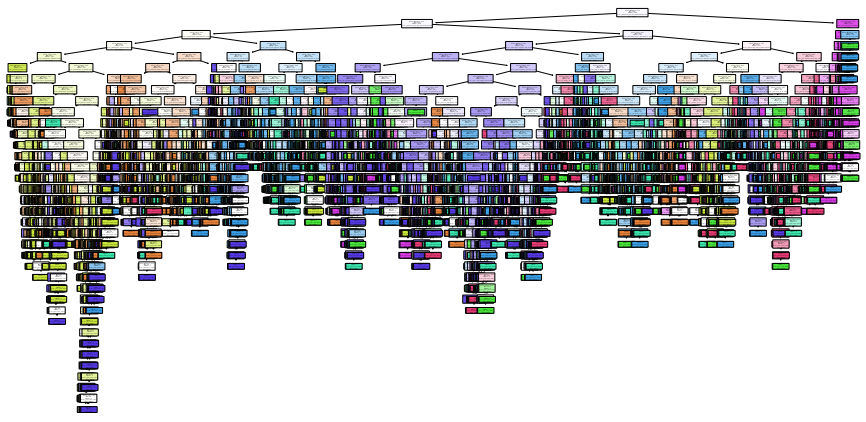

In [16]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_tree, filled=True,rounded=True, class_names=['ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8'],feature_names=preCovid_X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


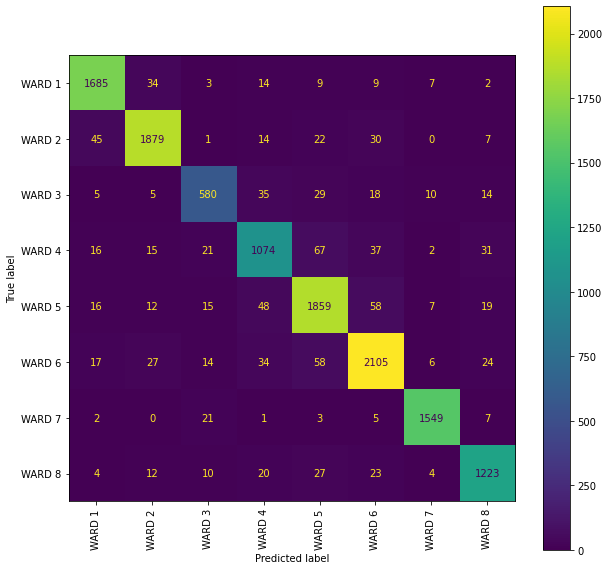

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_tree,X_test_pre,y_test_pre,
                      display_labels=['WARD 1', 'WARD 2', 'WARD 3', 'WARD 4','WARD 5','WARD 6','WARD 7','WARD 8'],
                      ax=ax, xticks_rotation='vertical')

In [18]:
# define alphas and impurities to prune tree
path = clf_tree.cost_complexity_pruning_path(X_train_pre, y_train_pre)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

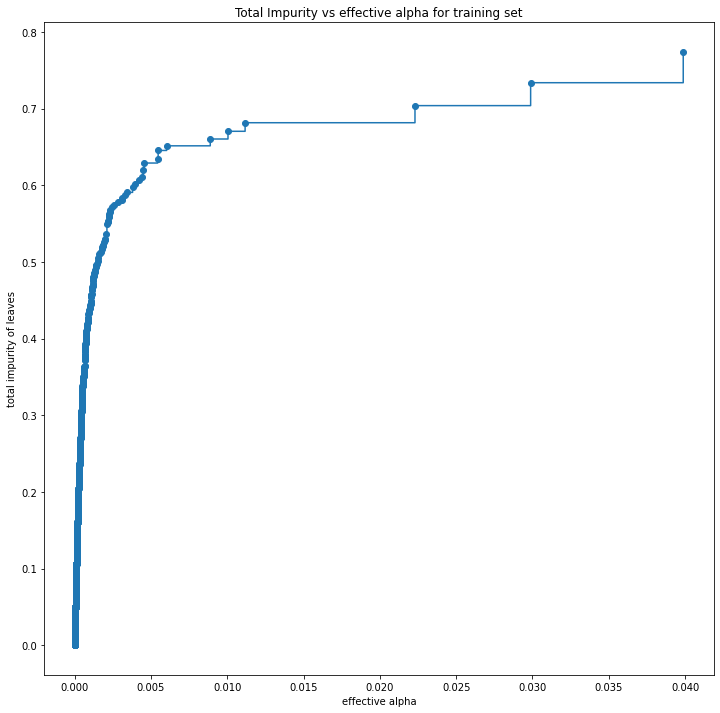

In [19]:
# plot the total impurity vs alpha
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [20]:
clf_dt_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=0.006)
clf_dt_pruned = clf_dt_pruned.fit(X_train_pre, y_train_pre)

In [21]:
y_pred_pre = clf_dt_pruned.predict(X_test_pre)
pruned_p_p = accuracy_score(y_test_pre, y_pred)
print("The model accuracy score is" , pruned_p_p)

The model accuracy score is 0.923088803088803


[Text(531.1730769230769, 366.93, 'distance_nightclubs <= 1.19\ngini = 0.863\nsamples = 30214\nvalue = [4235, 4714, 1605, 2838, 4745, 5398, 3829, 2850]\nclass = WARD 6'),
 Text(354.11538461538464, 285.39, 'distance_nightclubs <= 0.286\ngini = 0.848\nsamples = 26752\nvalue = [4235, 4714, 1403, 2825, 4601, 5398, 744, 2832]\nclass = WARD 6'),
 Text(193.15384615384616, 203.85000000000002, 'distance_metro <= 0.285\ngini = 0.772\nsamples = 12350\nvalue = [3515, 3978, 181, 1104, 1597, 1659, 0, 316]\nclass = WARD 2'),
 Text(128.76923076923077, 122.31, 'distance_nightclubs <= 0.158\ngini = 0.689\nsamples = 9432\nvalue = [3395, 3701, 0, 496, 290, 1465, 0, 85]\nclass = WARD 2'),
 Text(64.38461538461539, 40.77000000000004, 'gini = 0.646\nsamples = 6028\nvalue = [1903, 2912, 0, 283, 86, 813, 0, 31]\nclass = WARD 2'),
 Text(193.15384615384616, 40.77000000000004, 'gini = 0.71\nsamples = 3404\nvalue = [1492, 789, 0, 213, 204, 652, 0, 54]\nclass = WARD 1'),
 Text(257.53846153846155, 122.31, 'gini = 0.73

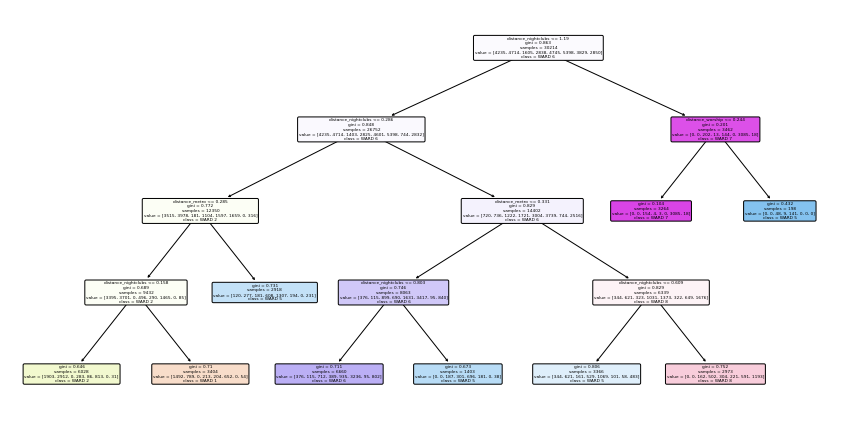

In [22]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True, rounded=True, 
          class_names=['WARD 1', 'WARD 2', 'WARD 3','WARD 4','WARD 5','WARD 6', 'WARD 7', 'WARD 8'], 
       feature_names=X_train_pre.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


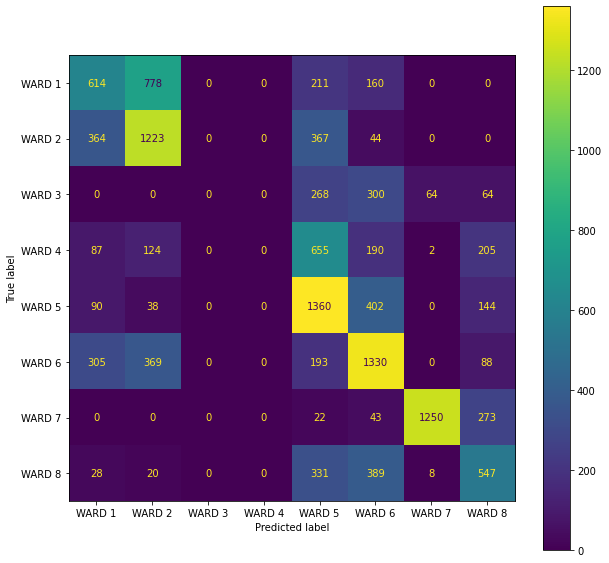

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_dt_pruned, X_test_pre, y_test_pre, 
                      display_labels=['WARD 1', 'WARD 2', 'WARD 3','WARD 4','WARD 5','WARD 6', 'WARD 7', 'WARD 8'], ax=ax)

In [24]:
#gather all alphas for comparison ----- this is the step that does not run fully. 
#clfs = []
#for ccp_alpha in ccp_alphas:
#    clf_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
#    clf_tree.fit(X_train_pre, y_train_pre)
#    clfs.append(clf_tree)

In [25]:
#accuracy vs alpha ------ Need the step above to run in order to run this
#train_scores_pre = [clf_tree.score(X_train, y_train) for clf in clfs]
#test_scores_pre = [clf_tree.score(X_test, y_test) for clf in clfs]

#fig, ax = plt.subplots()
#ax.set_xlabel("alpha")
#ax.set_ylabel("accuracy")
#ax.set_title("Accuracy vs alpha for training and testing sets")
#ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
#ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
#ax.legend()
#plt.show()

### Test Pre-Covid Model with Covid data

In [26]:
covid_test = covid.drop(columns=['daily_cases', 'daily_death', 'OUT_POSITIVE_QUARANTINE_PSMPD',
                                                     'total_cases', 'SHIFT', 'OFFENSE', 'date', 'LATITUDE', 'LONGITUDE', 
                                                     'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 
                                                     'ward_6', 'ward_7', 'ward_8'])

In [27]:
covid_X_test = covid_test.drop('WARD', axis=1).copy()
covid_y_test = covid_test['WARD'].copy()

In [28]:
X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(covid_X_test,covid_y_test,test_size=.3, random_state=0)

In [29]:
y_pred_ct1 = clf_tree.predict(X_test_ct)
p_c = accuracy_score(y_test_ct, y_pred_ct1)
print('The not pruned model accuracy score is', p_c)

The not pruned model accuracy score is 0.921936885141178


In [30]:
y_pred_ct2 = clf_dt_pruned.predict(X_test_ct)
pruned_p_c = accuracy_score(y_test_ct, y_pred_ct2)
print('The pruned model accuracy score is', pruned_p_c)

The pruned model accuracy score is 0.5059729142711128


## Covid Model Training on Ward



In [31]:
# decision tree accuracy without pruning
clf_tree_c = DecisionTreeClassifier(random_state=0).fit(X_train_c, y_train_c)
y_pred_c = clf_tree_c.predict(X_test_c)
c_c = accuracy_score(y_test_c, y_pred_c)
print('The model training score is', clf_tree_c.score(X_train_c, y_train_c))
print('The model accuracy score is', c_c)

The model training score is 0.9997946640018617
The model accuracy score is 0.9635556407308036


[Text(619.2812180489449, 401.3296875, 'distance_nightclubs <= 1.19\ngini = 0.862\nsamples = 73051\nvalue = [10350, 13600, 4120, 6709, 11247, 11638, 8692, 6695]\nclass = ward_2'),
 Text(405.17262979943064, 388.5890625, 'distance_nightclubs <= 0.237\ngini = 0.846\nsamples = 64929\nvalue = [10350, 13600, 3502, 6676, 10899, 11638, 1590, 6674]\nclass = ward_2'),
 Text(170.37344193948138, 375.8484375, 'distance_metro <= 0.271\ngini = 0.744\nsamples = 28413\nvalue = [8040, 10765, 340, 2178, 2933, 3488, 0, 669]\nclass = ward_2'),
 Text(93.9224755442003, 363.10781249999997, 'distance_nightclubs <= 0.077\ngini = 0.651\nsamples = 22393\nvalue = [7920, 10120, 0, 764, 330, 3035, 0, 224]\nclass = ward_2'),
 Text(19.487868831743224, 350.3671875, 'distance_metro <= 0.143\ngini = 0.509\nsamples = 6990\nvalue = [2048, 4436, 0, 188, 0, 251, 0, 67]\nclass = ward_2'),
 Text(11.287862513426424, 337.6265625, 'distance_worship <= 0.122\ngini = 0.352\nsamples = 3760\nvalue = [525, 2973, 0, 188, 0, 74, 0, 0]\nc

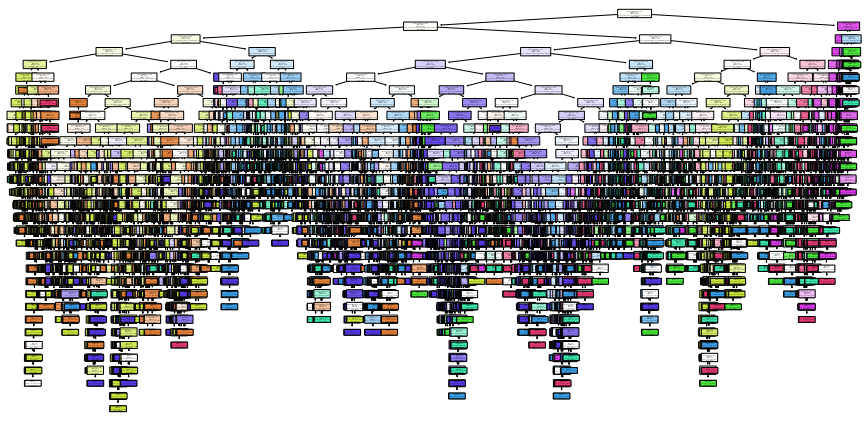

In [32]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_tree_c, filled=True,rounded=True, class_names=['ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8'],feature_names=covid_X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


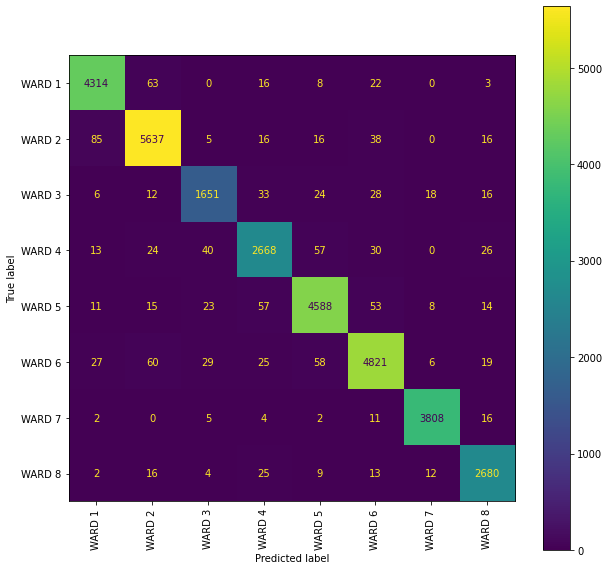

In [33]:
fig_c, ax_c = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_tree_c,X_test_c,y_test_c,
                      display_labels=['WARD 1', 'WARD 2', 'WARD 3', 'WARD 4','WARD 5','WARD 6','WARD 7','WARD 8'],
                      ax=ax_c, xticks_rotation='vertical')

In [34]:
# define alphas and impurities to prune tree
path_c = clf_tree_c.cost_complexity_pruning_path(X_train_c, y_train_c)
ccp_alphas_c, impurities_c = path_c.ccp_alphas, path_c.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

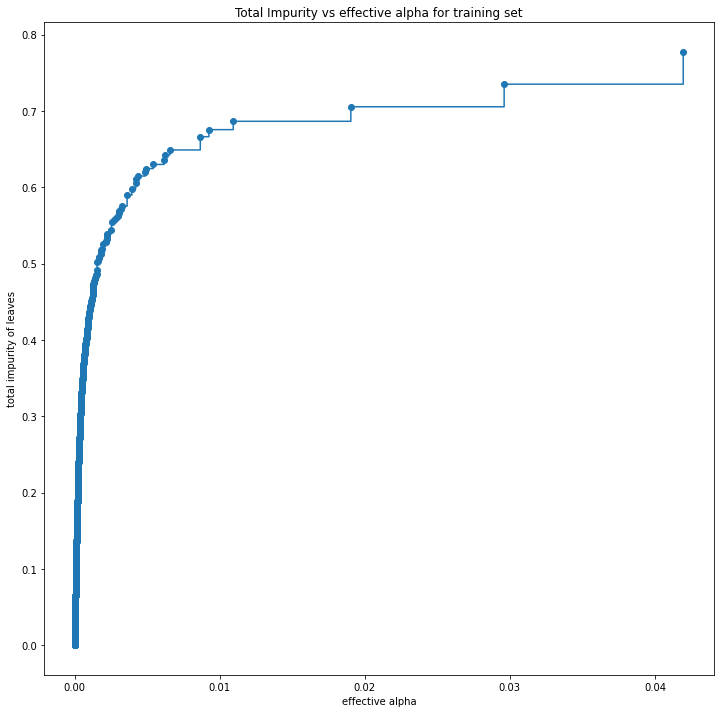

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(ccp_alphas_c[:-1], impurities_c[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [36]:
pruned_c = DecisionTreeClassifier(random_state=0, ccp_alpha=0.007)
pruned_c = pruned_c.fit(X_train_c, y_train_c)
y_pred_c = pruned_c.predict(X_test_c)
pruned_c_c = accuracy_score(y_test_c, y_pred_c)
print("The model accuracy score is" , pruned_c_c)

The model accuracy score is 0.4727865082407052


[Text(505.6875, 373.72499999999997, 'distance_nightclubs <= 1.19\ngini = 0.862\nsamples = 73051\nvalue = [10350, 13600, 4120, 6709, 11247, 11638, 8692, 6695]\nclass = WARD 2'),
 Text(313.875, 305.775, 'distance_nightclubs <= 0.237\ngini = 0.846\nsamples = 64929\nvalue = [10350, 13600, 3502, 6676, 10899, 11638, 1590, 6674]\nclass = WARD 2'),
 Text(139.5, 237.825, 'distance_metro <= 0.271\ngini = 0.744\nsamples = 28413\nvalue = [8040, 10765, 340, 2178, 2933, 3488, 0, 669]\nclass = WARD 2'),
 Text(69.75, 169.87499999999997, 'gini = 0.651\nsamples = 22393\nvalue = [7920, 10120, 0, 764, 330, 3035, 0, 224]\nclass = WARD 2'),
 Text(209.25, 169.87499999999997, 'gini = 0.732\nsamples = 6020\nvalue = [120, 645, 340, 1414, 2603, 453, 0, 445]\nclass = WARD 5'),
 Text(488.25, 237.825, 'distance_metro <= 0.412\ngini = 0.841\nsamples = 36516\nvalue = [2310, 2835, 3162, 4498, 7966, 8150, 1590, 6005]\nclass = WARD 6'),
 Text(348.75, 169.87499999999997, 'distance_nightclubs <= 0.803\ngini = 0.804\nsampl

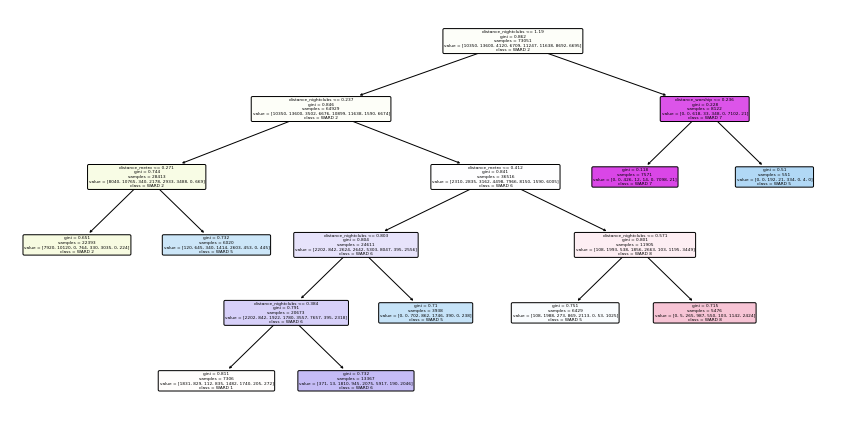

In [37]:
plt.figure(figsize=(15,7.5))
plot_tree(pruned_c,filled=True, rounded=True, 
          class_names=['WARD 1', 'WARD 2', 'WARD 3','WARD 4','WARD 5','WARD 6', 'WARD 7', 'WARD 8'], 
       feature_names=X_train_c.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


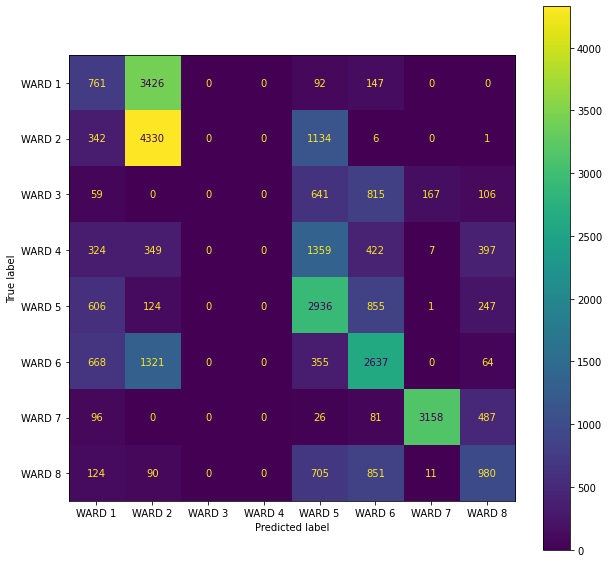

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(pruned_c, X_test_c, y_test_c, 
                      display_labels=['WARD 1', 'WARD 2', 'WARD 3','WARD 4','WARD 5','WARD 6', 'WARD 7', 'WARD 8'], ax=ax)

### Test Covid Model with Pre-Covid data

In [39]:
preCovid_test = preCovid.drop(columns=['SHIFT','OFFENSE','LATITUDE', 'LONGITUDE',
       'date','ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8'])

In [40]:
preCovid_X_test = preCovid_test.drop('WARD', axis=1).copy()
preCovid_y_test = preCovid_test['WARD'].copy()

In [41]:
X_train_pret, X_test_pret, y_train_pret, y_test_pret = train_test_split(preCovid_X_test,preCovid_y_test,test_size=.3, random_state=0)

In [42]:
y_pred_pret1 = clf_tree_c.predict(X_test_pret)
c_p = accuracy_score(y_test_pret, y_pred_pret1)
print('The not pruned model accuracy score is', c_p)

The not pruned model accuracy score is 0.9506563706563707


In [43]:
y_pred_pret2 = pruned_c.predict(X_test_pret)
pruned_c_p = accuracy_score(y_test_pret, y_pred_pret2)
print('The pruned model accuracy score is', pruned_c_p)

The pruned model accuracy score is 0.45984555984555986


### Results

In [44]:
print('DC Crime Analysis by Ward \n')
print('Pre-Covid Model - Not Pruned')
print('------------------------')
print(f'Accuracy with Pre-Covid Data: {p_p}')
print(f'Accuracy with Covid Data: {p_c} \n')
print('Pre-Covid Model - Pruned')
print('------------------------')
print(f'Accuracy with Pre-Covid Data: {pruned_p_p}')
print(f'Accuracy with Covid Data: {pruned_p_c} \n')
print('Covid Model - Not Pruned')
print('------------------------')
print(f'Accuracy with Pre-Covid Data: {c_c}')
print(f'Accuracy with Covid Data: {c_p} \n')
print('Covid Model - Pruned')
print('------------------------')
print(f'Accuracy with Pre-Covid Data: {pruned_c_p}')
print(f'Accuracy with Covid Data: {pruned_c_c}')


DC Crime Analysis by Ward 

Pre-Covid Model - Not Pruned
------------------------
Accuracy with Pre-Covid Data: 0.923088803088803
Accuracy with Covid Data: 0.921936885141178 

Pre-Covid Model - Pruned
------------------------
Accuracy with Pre-Covid Data: 0.923088803088803
Accuracy with Covid Data: 0.5059729142711128 

Covid Model - Not Pruned
------------------------
Accuracy with Pre-Covid Data: 0.9635556407308036
Accuracy with Covid Data: 0.9506563706563707 

Covid Model - Pruned
------------------------
Accuracy with Pre-Covid Data: 0.45984555984555986
Accuracy with Covid Data: 0.4727865082407052
